In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
from torch.utils.data import Dataset
import numpy as np

In [31]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-05-20 10:39:56--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-05-20 10:39:57--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [        <=>         ]  33.20M   848KB/s    in 56s     

2021-05-20 10:40:53 (608 KB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/trai

In [32]:
from torchvision.datasets import MNIST

transform = transforms.Compose([transforms.ToTensor()])

train_set = MNIST(root = './', train=True, download=True, transform=transform)
val_set = MNIST(root = './', train=False, download=True, transform=transform)

In [194]:
import random
class custom_dataset(Dataset):
    def __init__(self):
        self.data = MNIST(root = './', train=True, download=True, transform=transform)
    
    def __getitem__(self,index):
        r = next(iter(self.data))
        image,label= r
        random_int = random.randint(0,9)
        label = label+random_int
        return (image,random_int,label)
    
    def __len__(self):
        return len(self.data)
    

In [195]:
custom = custom_dataset()
next(iter(custom))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [48]:
# train_set= torchvision.datasets.MNIST(root='./data',train=True,\
#             download=True, transform = transforms.Compose([transforms.ToTensor()]))

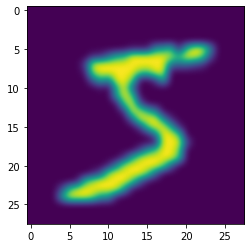

In [35]:
import matplotlib.pyplot as plt
plt.imshow(transforms.ToPILImage()(next(iter(train_set))[0]), interpolation="bicubic")

In [93]:
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True)
train_loader = torch.utils.data.DataLoader(custom, batch_size=10, shuffle=True)


In [94]:
# next(iter(train_loader))

In [95]:
train_set.train_labels.bincount()

/home/anuda/anaconda3/envs/pytorch/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [71]:
images,randoms,labels = next(iter(train_loader))

labels: tensor([12,  7, 12,  5, 12, 10, 14,  7,  7,  7])


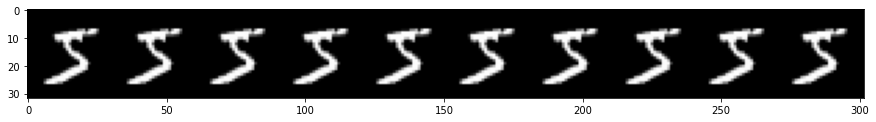

In [84]:

grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print('labels:', labels)

In [74]:
import torch.nn as nn
import torch.nn.functional as F

In [179]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=121,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=20)
        
    def forward(self,t,x):
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2, stride=2)
        
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2, stride=2)
        
        t = t.reshape(-1,12*4*4)
        
        t = self.fc1(t)
        t = F.relu(t)
#         print(t.shape)
#         print(torch.unsqueeze(x,dim=1).shape)
        t = torch.cat(([t, torch.unsqueeze(x,dim=1)]), 1)
#         print(t.shape)
        t = self.fc2(t)
        t = F.relu(t)
        
        t=self.out(t)
        
        return t
        
        
        

In [180]:
network = Network()
for name,param in network.named_parameters():
    print(name,' : ',param.shape)

conv1.weight  :  torch.Size([6, 1, 5, 5])
conv1.bias  :  torch.Size([6])
conv2.weight  :  torch.Size([12, 6, 5, 5])
conv2.bias  :  torch.Size([12])
fc1.weight  :  torch.Size([120, 192])
fc1.bias  :  torch.Size([120])
fc2.weight  :  torch.Size([60, 121])
fc2.bias  :  torch.Size([60])
out.weight  :  torch.Size([20, 60])
out.bias  :  torch.Size([20])


In [181]:
import torch.optim as optim

torch.set_grad_enabled(True)

In [182]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [183]:
for batch in train_loader:
    print(type(batch))
    break

<class 'list'>


In [184]:
train_loader = torch.utils.data.DataLoader(custom, batch_size=100,shuffle=True)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
#         print(len(batch))
        images,randoms ,labels = batch
#         break

        preds = network(images,randoms) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch 0 total_correct: 54432 loss: 233.03907533735037
epoch 1 total_correct: 60000 loss: 9.451550151221454
epoch 2 total_correct: 60000 loss: 2.639935783110559
epoch 3 total_correct: 60000 loss: 1.167169265798293
epoch 4 total_correct: 60000 loss: 0.6246958782430738
epoch 5 total_correct: 60000 loss: 0.368671902542701
epoch 6 total_correct: 60000 loss: 0.230467613437213
epoch 7 total_correct: 60000 loss: 0.1495071562967496
epoch 8 total_correct: 60000 loss: 0.10028255898214411
epoch 9 total_correct: 60000 loss: 0.06813690053240862


In [196]:
image,randoms,label = next(iter(custom))

In [203]:
F.softmax(network(image.unsqueeze(0),torch.tensor(randoms).unsqueeze(0))).argmax(dim=1)

/home/anuda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([11])

In [204]:
label

11

In [200]:
randoms

6